### The data set has information about features of silhouette extracted from the images of different cars

Four "Corgie" model vehicles were used for the experiment: a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 cars. This particular combination of vehicles was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more difficult to distinguish between the cars.



### 1. Read the dataset using function .dropna() - to avoid dealing with NAs as of now

In [1]:
#Importing the reqiured libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'whitegrid')
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.spatial import distance

In [2]:
df = pd.read_csv("D:/PGPDSE/USL/Mini Project/vehicle.csv")
display(df.head())

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


In [3]:
df.groupby('class')['compactness', 'hollows_ratio'].mean()

<ipython-input-3-4974197bdd9c>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('class')['compactness', 'hollows_ratio'].mean()


,compactness,hollows_ratio
class,,
bus,91.591743,191.325688
car,96.184149,197.582751
van,90.562814,196.145729


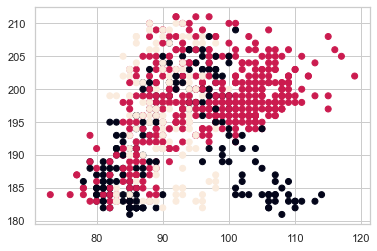

In [4]:
plt.scatter(df['compactness'], df['hollows_ratio'], c = df['class'].map({'bus' : 0, 'car' : 1, 'van' : 2}))
plt.show()

In [5]:
df['class'].value_counts()

car    429
bus    218
van    199
Name: class, dtype: int64

In [6]:
print(df.shape)

(846, 19)


In [7]:
print(df.isna().sum())

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64


In [8]:
df.dropna(inplace = True)
print(df.shape)

(813, 19)


### 2. Print/ Plot the dependent (categorical variable) - Class column

Since the variable is categorical, you can use value_counts function

In [9]:
print(df['class'].value_counts())

car    413
bus    205
van    195
Name: class, dtype: int64


### 3. Check for any missing values in the data 

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 813 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  813 non-null    int64  
 1   circularity                  813 non-null    float64
 2   distance_circularity         813 non-null    float64
 3   radius_ratio                 813 non-null    float64
 4   pr.axis_aspect_ratio         813 non-null    float64
 5   max.length_aspect_ratio      813 non-null    int64  
 6   scatter_ratio                813 non-null    float64
 7   elongatedness                813 non-null    float64
 8   pr.axis_rectangularity       813 non-null    float64
 9   max.length_rectangularity    813 non-null    int64  
 10  scaled_variance              813 non-null    float64
 11  scaled_variance.1            813 non-null    float64
 12  scaled_radius_of_gyration    813 non-null    float64
 13  scaled_radius_of_gyr

In [11]:
print(df.isna().sum())

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64


##### No Missing Values

### 4. Standardize the data 

Since the dimensions of the data are not really known to us, it would be wise to standardize the data using z scores before we go for any clustering methods.
You can use zscore function to do this

In [12]:
X = df.drop('class', 1)
y = df['class']
SS = StandardScaler()
X_std = pd.DataFrame(SS.fit_transform(X), columns = X.columns)
display(X_std.head())

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,0.163231,0.520408,0.060669,0.264970,1.283254,0.299721,-0.198517,0.129648,-0.217151,0.766312,-0.397397,-0.339014,0.301676,-0.321192,-0.071523,0.371287,-0.321809,0.171837
1,-0.322874,-0.619123,0.124067,-0.836393,-0.599253,0.085785,-0.591720,0.514333,-0.606014,-0.337462,-0.590034,-0.618754,-0.502972,-0.053505,0.538425,0.147109,0.003400,0.442318
2,1.256966,0.845988,1.518823,1.187734,0.530251,0.299721,1.162569,-1.152637,0.949438,0.697326,1.111591,1.122486,1.415804,0.080339,1.555006,-0.413338,-0.159204,0.036596
3,-0.079822,-0.619123,-0.002729,-0.300595,0.153750,0.085785,-0.742952,0.642562,-0.606014,-0.337462,-0.911095,-0.738643,-1.462359,-1.258099,-0.071523,-0.301249,1.629444,1.524243
4,-1.052030,-0.130753,-0.763506,1.068668,5.173770,9.285029,-0.591720,0.514333,-0.606014,-0.268476,1.689501,-0.647299,0.425468,7.307905,0.538425,-0.189159,-1.460039,-1.721531


### K - Means Clustering

### 5. Assign a dummy array called distortion

You can later use this array to plot the elbow plot

In [13]:
distortion = []

### 6. Calculating distortion - C distance

Iterating values of k from 1 to 10 fit K means model
Using c distance - Get the measure for Sum of squares error.

**Here, logically K-Means attempts to minimize distortion defined by the the sum of the squared distances between each observation and its closest centroid.**

In [14]:
for k in range(1, 11):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(X_std)
    distortion.append(kmeans.inertia_)

distortion_df = pd.DataFrame({'K' : list(range(1, 11)),
                          'Distortion' : distortion})
display(distortion_df)

,K,Distortion
0,1,14634.000000
1,2,8623.136976
2,3,7037.467395
3,4,5741.186965
4,5,5189.588855
5,6,4706.433256
6,7,4348.840290
7,8,4100.569574
8,9,3846.385537
9,10,3652.614719


### 7. Plotting Elbow/ Scree Plot

Use Matplotlib to plot the scree plot - Note: Scree plot plots distortion vs the no of clusters

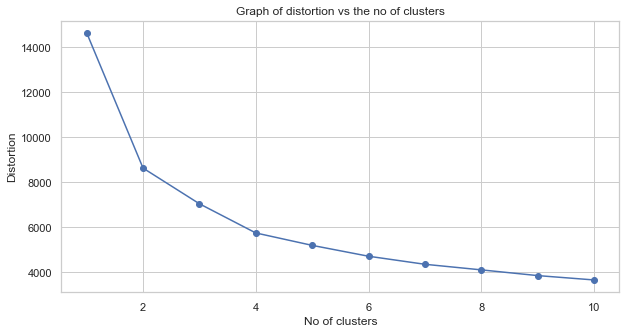

In [15]:
plt.figure(figsize = (10, 5))
plt.plot(distortion_df.K, distortion_df.Distortion, marker = 'o')
plt.title('Graph of distortion vs the no of clusters')
plt.xlabel('No of clusters')
plt.ylabel('Distortion')
plt.show()

### 8. Find out the optimal value of K

In [16]:
# We can see from the scree plot that after the No of clusters = 4, there is not any significant reduction in Distortion

In [17]:
# So the optimal value of K = 4

### 9. Using optimal value of K - Cluster the data. 
Note: Since the data has more than 2 dimension we cannot visualize the data. As an alternative, we can observe the centroids and note how they are distributed across different dimensions

In [18]:
# Now we know our best k value is 4

kmeans = KMeans(n_clusters=4)
kmeans.fit(X_std)
centroids = kmeans.cluster_centers_
print(centroids)

[[-9.15758407e-01 -5.22402678e-01 -8.89505987e-01 -1.08772789e+00
  -5.61970783e-01 -3.00015871e-01 -7.79778853e-01  8.67364185e-01
  -7.45939378e-01 -4.85536418e-01 -8.01746438e-01 -7.83836827e-01
  -3.90574645e-01  7.83159216e-01 -9.02385712e-02 -2.96089665e-01
  -1.04774549e+00 -1.10361198e+00]
 [ 1.15442786e+00  1.18428647e+00  1.21198691e+00  9.73321772e-01
   9.49213388e-02  2.18659142e-01  1.29796844e+00 -1.21424667e+00
   1.30184458e+00  1.09830595e+00  1.20590258e+00  1.30898668e+00
   1.09121291e+00 -1.07878646e-01  1.68326262e-01  2.67954844e-01
   4.67043879e-03  1.90327006e-01]
 [-2.28397024e-01 -5.77112825e-01 -3.08062421e-01 -4.12415311e-02
   1.78444965e-01 -1.73698681e-01 -4.56879712e-01  3.21990722e-01
  -4.85591783e-01 -5.39969043e-01 -4.21528655e-01 -4.61480779e-01
  -6.05499266e-01 -6.42849115e-01 -6.23412553e-02  1.29630066e-02
   8.22191910e-01  7.05383081e-01]
 [-7.33024343e-01  7.27349604e-02 -2.72170954e-01  2.94768327e+00
   6.83665190e+00  8.69670551e+00 -5.

### 10. Store the centroids in a dataframe with column names from the original dataset given 

Hint: Use pd.Dataframe function 

In [19]:
cent = pd.DataFrame(kmeans.cluster_centers_, columns = X_std.columns)
display(cent)

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,-0.915758,-0.522403,-0.889506,-1.087728,-0.561971,-0.300016,-0.779779,0.867364,-0.745939,-0.485536,-0.801746,-0.783837,-0.390575,0.783159,-0.090239,-0.296090,-1.047745,-1.103612
1,1.154428,1.184286,1.211987,0.973322,0.094921,0.218659,1.297968,-1.214247,1.301845,1.098306,1.205903,1.308987,1.091213,-0.107879,0.168326,0.267955,0.004670,0.190327
2,-0.228397,-0.577113,-0.308062,-0.041242,0.178445,-0.173699,-0.456880,0.321991,-0.485592,-0.539969,-0.421529,-0.461481,-0.605499,-0.642849,-0.062341,0.012963,0.822192,0.705383
3,-0.733024,0.072735,-0.272171,2.947683,6.836652,8.696706,-0.535008,0.466248,-0.557406,0.283411,1.697528,-0.588068,0.212701,4.965638,-0.274839,-0.231193,-0.707994,-0.453651


### 11. Use kmeans.labels_ function to print out the labels of the classes

In [20]:
print(kmeans.labels_)

[2 2 1 2 3 2 2 2 2 2 2 2 2 1 0 2 1 0 0 2 2 1 2 0 1 1 0 2 2 2 1 2 0 3 1 0 1
 0 0 2 1 0 0 0 0 2 0 2 1 2 1 2 2 0 1 0 1 0 0 0 2 0 1 2 1 1 2 0 2 1 2 0 0 1
 2 0 2 1 2 0 2 0 1 2 1 2 0 1 0 0 1 0 3 2 2 0 1 1 0 0 1 2 2 0 0 0 2 1 1 2 0
 0 2 0 0 0 0 0 2 1 1 2 2 0 1 3 0 2 0 2 2 1 0 2 1 2 2 2 2 1 2 2 1 2 1 2 0 2
 0 1 2 2 1 1 2 1 0 0 1 1 2 1 2 2 2 2 0 1 0 2 0 1 2 2 2 1 2 1 2 1 2 0 1 0 0
 0 2 2 1 1 2 2 2 0 1 2 2 2 1 0 0 1 0 2 1 0 0 0 2 1 2 1 0 0 0 0 1 2 0 2 1 0
 2 2 0 1 0 0 2 2 1 0 1 0 2 2 1 2 2 1 1 0 2 2 2 1 0 2 2 0 0 2 2 1 2 0 0 1 2
 2 0 0 1 0 2 1 0 2 3 2 2 1 2 1 0 2 2 1 2 2 2 0 2 1 1 1 1 0 2 1 0 0 0 2 0 1
 1 0 1 2 0 1 0 2 2 1 1 0 1 1 0 1 2 2 2 0 0 1 1 1 2 2 2 1 0 2 0 1 2 2 1 2 1
 1 1 2 0 0 1 0 0 0 2 2 2 2 0 1 1 0 0 1 0 1 0 1 2 0 2 0 3 1 0 2 2 2 1 2 2 2
 2 1 2 1 2 1 2 0 0 2 2 2 0 0 2 0 1 2 2 0 0 1 2 0 2 2 1 2 1 2 1 1 0 0 1 2 0
 0 2 1 1 0 2 1 1 0 1 1 1 2 2 2 2 2 1 0 0 2 1 2 2 1 2 0 1 0 0 1 2 0 1 1 1 0
 1 1 0 2 0 1 1 2 2 0 0 1 2 0 1 1 2 0 1 1 2 0 0 1 1 1 0 0 1 1 1 2 2 1 0 2 1
 2 0 0 2 1 0 2 2 0 3 1 2 

### 12. Use kmeans.labels_ function to print out the labels of the classes

In [21]:
print(kmeans.labels_)

[2 2 1 2 3 2 2 2 2 2 2 2 2 1 0 2 1 0 0 2 2 1 2 0 1 1 0 2 2 2 1 2 0 3 1 0 1
 0 0 2 1 0 0 0 0 2 0 2 1 2 1 2 2 0 1 0 1 0 0 0 2 0 1 2 1 1 2 0 2 1 2 0 0 1
 2 0 2 1 2 0 2 0 1 2 1 2 0 1 0 0 1 0 3 2 2 0 1 1 0 0 1 2 2 0 0 0 2 1 1 2 0
 0 2 0 0 0 0 0 2 1 1 2 2 0 1 3 0 2 0 2 2 1 0 2 1 2 2 2 2 1 2 2 1 2 1 2 0 2
 0 1 2 2 1 1 2 1 0 0 1 1 2 1 2 2 2 2 0 1 0 2 0 1 2 2 2 1 2 1 2 1 2 0 1 0 0
 0 2 2 1 1 2 2 2 0 1 2 2 2 1 0 0 1 0 2 1 0 0 0 2 1 2 1 0 0 0 0 1 2 0 2 1 0
 2 2 0 1 0 0 2 2 1 0 1 0 2 2 1 2 2 1 1 0 2 2 2 1 0 2 2 0 0 2 2 1 2 0 0 1 2
 2 0 0 1 0 2 1 0 2 3 2 2 1 2 1 0 2 2 1 2 2 2 0 2 1 1 1 1 0 2 1 0 0 0 2 0 1
 1 0 1 2 0 1 0 2 2 1 1 0 1 1 0 1 2 2 2 0 0 1 1 1 2 2 2 1 0 2 0 1 2 2 1 2 1
 1 1 2 0 0 1 0 0 0 2 2 2 2 0 1 1 0 0 1 0 1 0 1 2 0 2 0 3 1 0 2 2 2 1 2 2 2
 2 1 2 1 2 1 2 0 0 2 2 2 0 0 2 0 1 2 2 0 0 1 2 0 2 2 1 2 1 2 1 1 0 0 1 2 0
 0 2 1 1 0 2 1 1 0 1 1 1 2 2 2 2 2 1 0 0 2 1 2 2 1 2 0 1 0 0 1 2 0 1 1 1 0
 1 1 0 2 0 1 1 2 2 0 0 1 2 0 1 1 2 0 1 1 2 0 0 1 1 1 0 0 1 1 1 2 2 1 0 2 1
 2 0 0 2 1 0 2 2 0 3 1 2 